# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Cecilia Agnes Vechrisda Manalu
- Email: sionmarcelinohia@gmail.com
- Id Dicoding: cecilia_agnes04

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pickle

### Menyiapkan data yang akan digunakan

In [ ]:
df = pd.read_csv('employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

### Info dan Missing Values

In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

### EDA Univariate: Distribusi Target dan Fitur Numerik

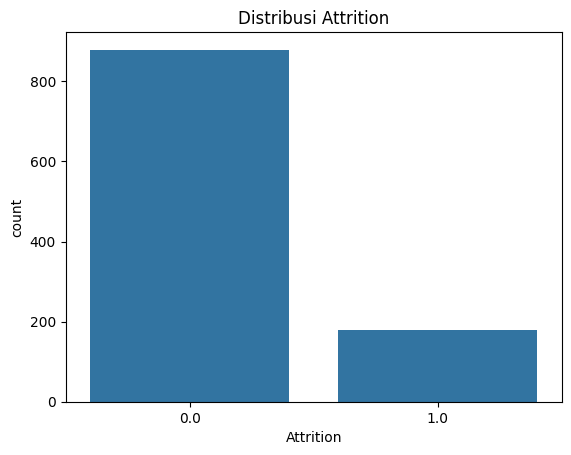

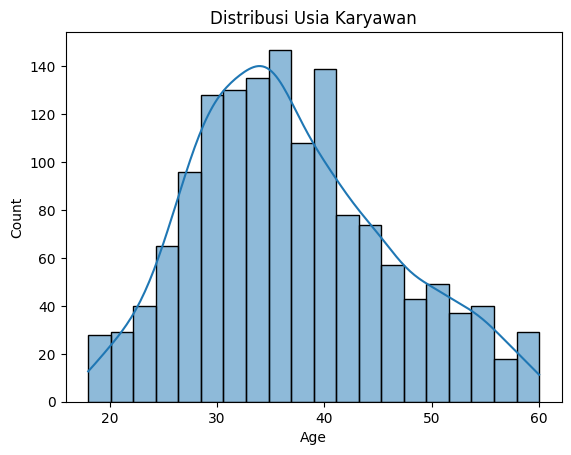

In [ ]:
# Distribusi Attrition
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Attrition')
plt.show()

# Distribusi Usia
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Usia Karyawan')
plt.show()

### EDA Kategorikal: Distribusi Department

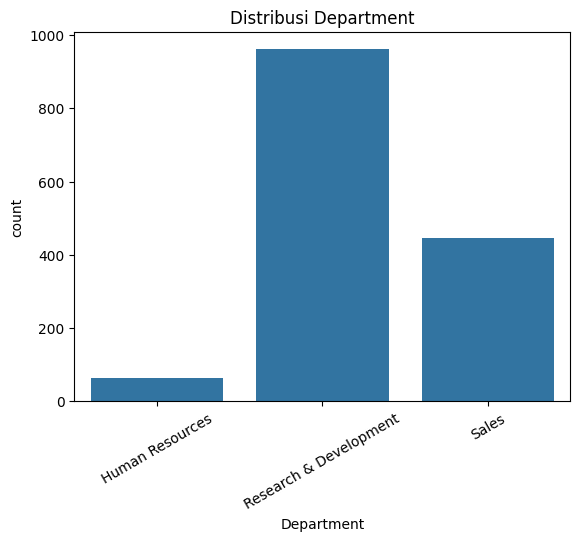

In [ ]:
sns.countplot(x='Department', data=df)
plt.title('Distribusi Department')
plt.xticks(rotation=30)
plt.show()

### EDA Multivariate: Attrition per Department

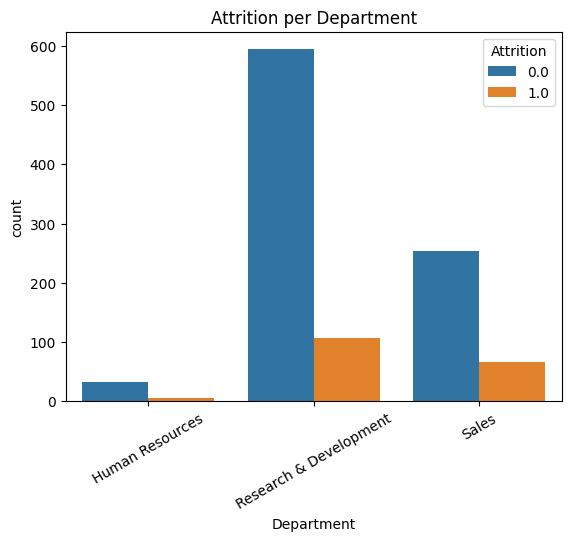

In [ ]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition per Department')
plt.xticks(rotation=30)
plt.show()

### Korelasi Numerikal

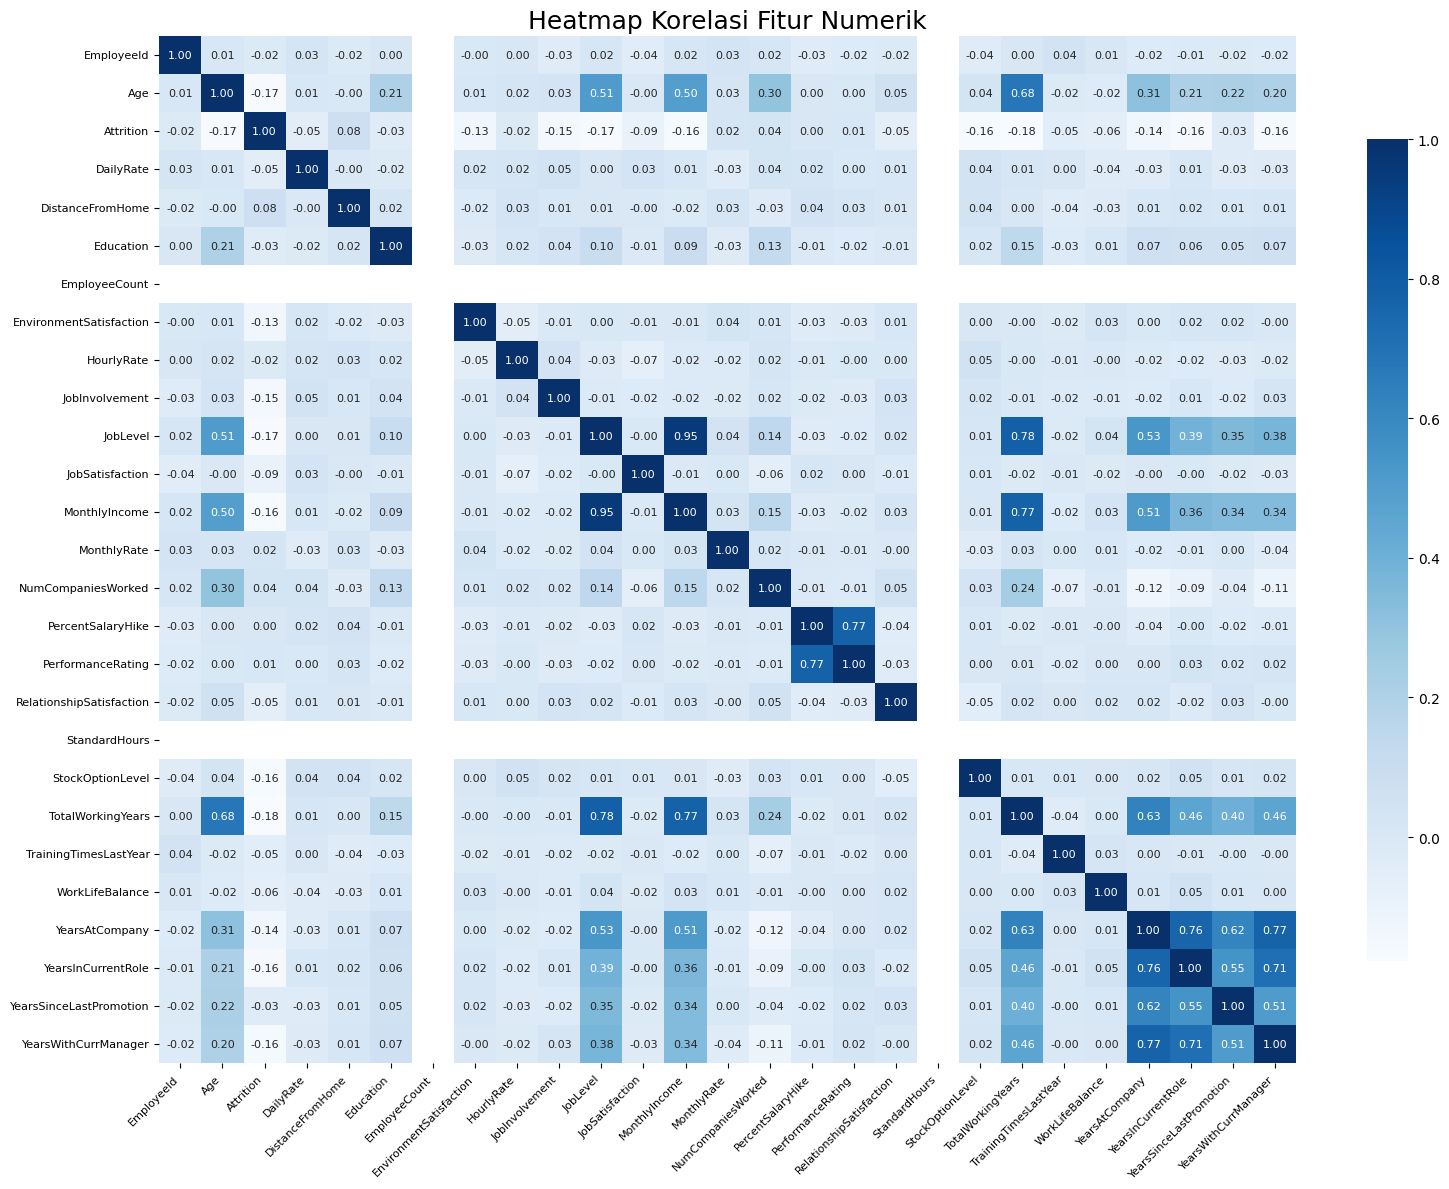

In [ ]:
plt.figure(figsize=(16, 12))  # Perbesar ukuran figure
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='Blues',
    annot_kws={"size": 8},  # Ukuran font angka lebih kecil
    cbar_kws={"shrink": .8}
)
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Label sumbu X kecil dan miring
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

In [ ]:
# Drop kolom tidak relevan
drop_cols = ['EmployeeId', 'EmployeeCount', 'StandardHours', 'Over18']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Drop baris dengan target kosong
df = df.dropna(subset=['Attrition'])

# Pastikan target integer
df['Attrition'] = df['Attrition'].astype(int)

# Tentukan kolom kategorikal dan numerik
cat_cols = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime'
]
num_cols = [col for col in df.columns if col not in cat_cols + ['Attrition']]

# Label encoding kategorikal
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Scaling numerik
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Simpan encoder, scaler, kolom
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('num_cols.pkl', 'wb') as f:
    pickle.dump(num_cols, f)
with open('cat_cols.pkl', 'wb') as f:
    pickle.dump(cat_cols, f)

## Modeling

In [ ]:
# Pisahkan fitur dan target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_leaf=5)
model.fit(X_train, y_train)

# Simpan model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Evaluation

Akurasi model: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       176
           1       0.83      0.14      0.24        36

    accuracy                           0.85       212
   macro avg       0.84      0.57      0.58       212
weighted avg       0.85      0.85      0.80       212



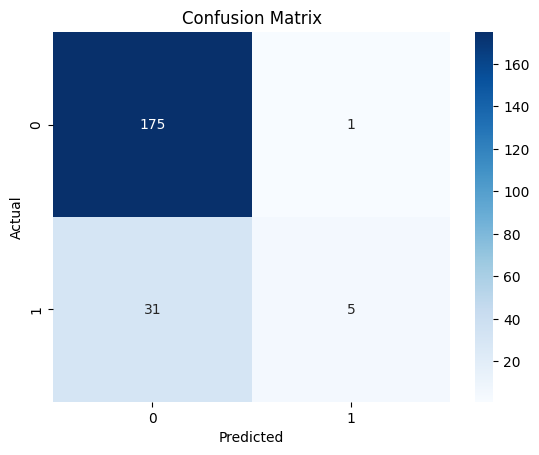

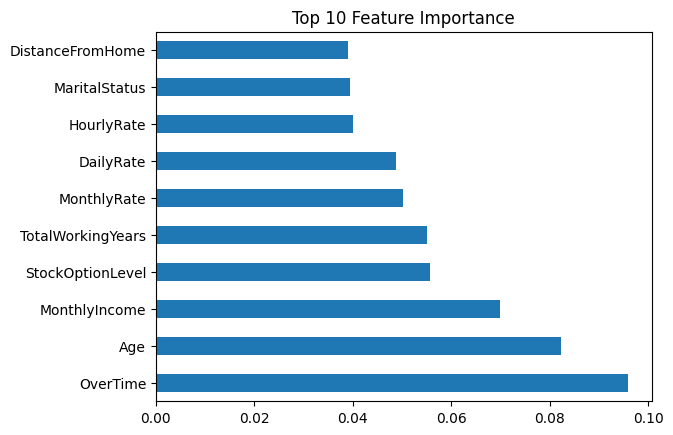

In [ ]:
y_pred = model.predict(X_test)
print(f"Akurasi model: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

importances = model.feature_importances_
feat_names = X.columns
feat_importances = pd.Series(importances, index=feat_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.show()

## Insight/Kesimpulan

- Faktor-faktor seperti OverTime, JobRole, Department, dan BusinessTravel berpengaruh terhadap attrition.
- Model Random Forest berhasil memprediksi attrition dengan akurasi yang baik.
- Terdapat korelasi antara beberapa variabel numerik dengan Attrition.